In [1]:
!pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/12.8 MB 4.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.8 MB 4.3 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/12.8 MB 4.4 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/12.8 MB 4.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.8/12.8 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 7.1/12.8 MB 4.9 MB/s eta 0:00:02
   ------------------------- -------------- 8.1/12.8 MB 4.9 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 5.1 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.8 MB 5.3 MB/s eta 0:00:01
   ------------------------------------- -- 12.1/12.8 MB 

  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


c:\Users\parshav\AppData\Local\Programs\Python\Python311\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\parshav\AppData\Local\Programs\Python\Python311\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\parshav\AppData\Local\Programs\Python\Python311\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will a

LIME Explanation for test instance 0:
EYE_ET_PupilLeft_max > 0.44: -0.0157
EYE_ET_PupilRight_max > 0.32: -0.0134
TIVA_Lip Stretch_std > 0.61: -0.0134
IVT_Saccade Start_mean <= -0.72: -0.0117
EEG_Gamma_TP10_std > 0.45: -0.0098
0.11 < EEG_Beta_TP10_min <= 0.45: 0.0070
EEG_Delta_TP10_max <= -0.63: 0.0067
GSR_Timestamp RAW_mean > 0.67: 0.0065
EEG_Gamma_TP9_mean <= -0.70: 0.0063
-0.36 < TIVA_Roll_std <= 0.16: 0.0056


c:\Users\parshav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\parshav\AppData\Local\Programs\Python\Python311\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\parshav\AppData\Local\Programs\Python\Python311\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature]

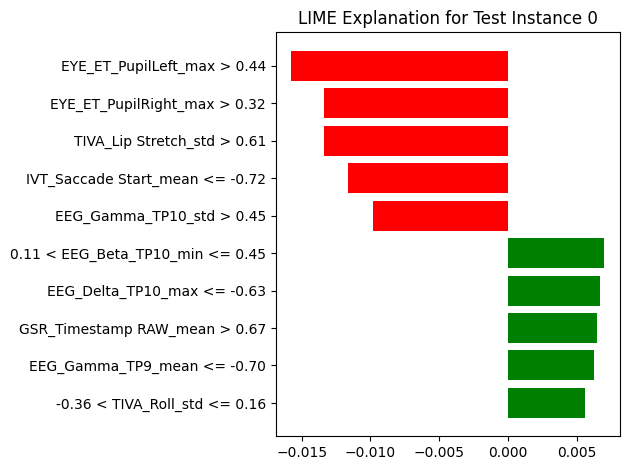

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load preprocessed features and targets
X = pd.read_csv('features_preprocessed.csv')
y = pd.read_csv('targets.csv')

# Map target labels to binary numerical values
y_label = y['TARGET_verdict'].map({'INCORRECT': 0, 'CORRECT': 1})

# Drop missing target rows
mask = y_label.notna()
X = X.loc[mask]
y_label = y_label.loc[mask]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_label, test_size=0.2, random_state=42, stratify=y_label)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Set up LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['INCORRECT', 'CORRECT'],
    mode='classification',
    discretize_continuous=True
)

# Pick an instance to explain (first test sample)
i = 0
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=rf.predict_proba,
    num_features=10
)

# Show explanation as list of (feature, weight)
print(f"LIME Explanation for test instance {i}:")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

# Plot explanation
fig = exp.as_pyplot_figure()
plt.title(f'LIME Explanation for Test Instance {i}')
plt.tight_layout()
plt.show()
